# Linear Regression

### Part I: Demo of concepts

First, we'll go through a simple example to demonstrate what we mean by 'linear' and by 'regression'. 

#### Step 1: Understand the dataset and our task

'Mendota.csv'is a dataset with just one feature (year) and just one response variable (annual ice cover in Lake Mendota). Essentially, we're going to see if there's a discernable trend in annual ice cover if we just use time as a factor; another way to think about it: use time, in years, to predict annual ice cover. The idea in a dataset and task like this is, if there's an over-time trend, we can just plug in next month or next year to the model and it will give us a very rough estimate of the future value, e.g., use trend in the last 36 months to predict next month's sales. Note that time series forcasting is a discipline of its own.

#### Step 2: Load in the dataset

In [4]:
import numpy as np

data = np.loadtxt('Mendota.csv',delimiter=',') 
x = data[:,0] # First column is the year
x = x.reshape((-1,1)) # We're just reformatting x for logistical reasons
y = data[:,1] # Second column is the ice cover

#### Step 3: Fit a linear regression model

Note that we didn't split the dataset to testset and trainset, as this is just a demo of concepts. <br> 
But if you were to split the dataset into train/testset, what's one way to do it?

In [5]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(x,y)
print('Slope of the fitted line: ' + str(model.coef_[0]))
print('Intercept of the fitted line: ' + str(model.intercept_))

Slope of the fitted line: -0.19242379978576304
Intercept of the fitted line: 474.99182004089994


#### Step 4: Visualize the model with the data

Based on the visualization, why do you think it's called 'linear'? What do you think 'regression' means? 

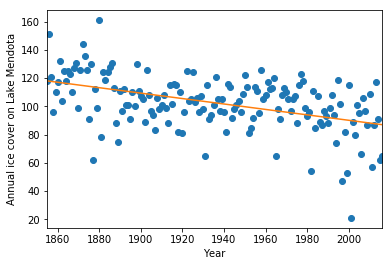

In [7]:
import matplotlib.pyplot as plt

plt.plot(x,y,'o')
plt.plot(x,model.coef_[0]*x + model.intercept_)
plt.xlabel('Year')
plt.ylabel('Annual ice cover on Lake Mendota')
plt.xlim((np.min(x),np.max(x)))
plt.show()

### Part II: A "real" model

Now we are going to train and test a model.

#### Step 1: Understand the data and the task

'brca_reduced.csv' is a gene expression dataset. Each column is a different gene, and each row is a cell or a sample from from the gene expression levels were measured. BRCA1 is a gene that's known to predispose certain population to breast cancer. When you construct gene regulation networks, you want to connect genes that are known to influence other genes. In this particular task, we're going to find a gene regulation network focused on BRCA1 gene. Namely, we want to use all other gene expresison levels (the first 112 columns) to predict BRCA1 gene expression (last column).

#### Step 2: Load the dataset

In [8]:
data = np.loadtxt('brca_reduced.csv',delimiter=',')
X = data[:,0:-1]
y = data[:,-1] # BRACA gene, last column

#### Step 3: Split to trainset and test set

In [9]:
# Split trainset 60 vs testset 40
n = X.shape[0]
n_train = int(n*0.6)
X_train = X[0:n_train,:]
y_train = y[0:n_train]
X_test = X[n_train:,:]
y_test = y[n_train:]

#### Step 4: Train a linear regression model

In [11]:
model = LinearRegression().fit(X_train,y_train)

#### Step 5: Visualize the 'slope' of each gene with respect to BRCA gene expression level

A more natural way of thinking about the learned coefficients might be as each gene's weight or contribution to predicting the BRCA gene expression. <br>
If you know a little bit about biology and gene regulation, what do you think the negative coefficient/slope/weight/contribution means in this model? What about the positive coefficients? What aboue zero coefficient?

Text(0,0.5,'Coefficient')

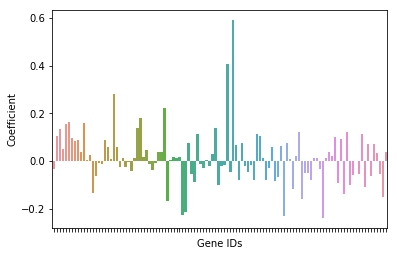

In [27]:
import seaborn as sns

x = np.arange(X.shape[1]) #gene IDs
ax = sns.barplot(x=x,y=model.coef_)
ax.set_xlabel('Gene IDs')
ax.set_xticklabels([])
ax.set_ylabel('Coefficient')

#### Step 6: Measure performance on testset

Pearson correlation between prediction and true gene expression value: 0.5769426085737136


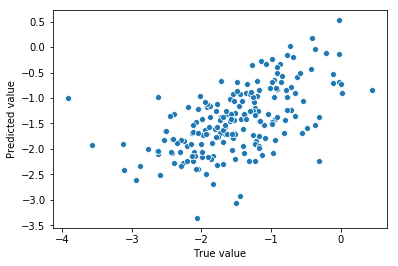

In [28]:
from scipy.stats import pearsonr
y_pred = np.dot(X_test,model.coef_) + model.intercept_
r = pearsonr(y_test,y_pred)[0]
print('Pearson correlation between prediction and true gene expression value: ' + str(r))

ax = sns.scatterplot(y_test,y_pred)
ax.set_xlabel('True value')
ax.set_ylabel('Predicted value')
plt.show()

### Part III: Regularization

Here we demonstrate why one might use regularization, with LASSO regularization on linear regression models. <br>
We use the same 'brca_reduced.csv' dataset from above.

#### Step 1: Train a LASSO linear regression model

In [30]:
from sklearn import linear_model
model_lasso = linear_model.Lasso(alpha=0.1).fit(X_train,y_train)

#### Step 2: Visualize the model coefficients

What do you notice, when compared to the vanilla linear regression model coefficients? What does the coefficent of 0 mean? <br>
Again, if you know a little bit about biology/gene regulation, how could you use this model?

Text(0,0.5,'LASSO Coefficient')

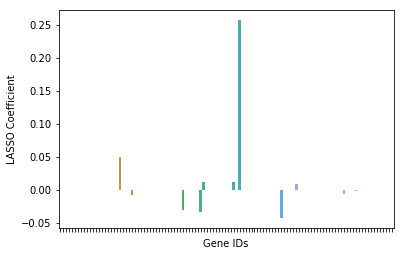

In [31]:
x = np.arange(X.shape[1]) #gene IDs
ax = sns.barplot(x=x,y=model_lasso.coef_)
ax.set_xlabel('Gene IDs')
ax.set_xticklabels([])
ax.set_ylabel('LASSO Coefficient')

#### Step 6: Measure performance on testset 

How does Pearson correlation compare to the vanilla linear regression model?

Pearson correlation between LASSO model prediction and true gene expression value: 0.5659912264586048


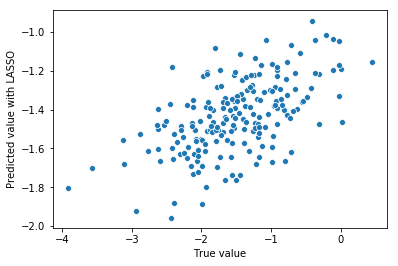

In [32]:
from scipy.stats import pearsonr
y_lasso_pred = np.dot(X_test,model_lasso.coef_) + model_lasso.intercept_
r = pearsonr(y_test,y_lasso_pred)[0]
print('Pearson correlation between LASSO model prediction and true gene expression value: ' + str(r))

ax = sns.scatterplot(y_test,y_lasso_pred)
ax.set_xlabel('True value')
ax.set_ylabel('Predicted value with LASSO')
plt.show()